<a href="https://colab.research.google.com/github/abosedealli/SIT723UNIT_STOCK_-PREDICTION_AR_ARIMA_LSTM_LR-/blob/main/AutoRegression_Netfflix_Best_Prediction_(6%20month_dataset)model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Time Series AR Model

In [77]:
!pip install yfinance
!pip  install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split
a_df =pd.read_csv('/content/newntflixs.csv') 
a_df = pd.DataFrame(a_df)

# New Section

In [85]:
a_df = a_df.asfreq('d') # Alterating the frequency to day
a_df.index # Checking the frequency
a_df = a_df.fillna(method='ffill') # Fill missing values

# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)

In [87]:
a_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/07/2022,176.490005,180.100006,174.270004,179.949997,179.949997,5201600
1,5/07/2022,176.279999,185.919998,172.679993,185.880005,185.880005,7334300
2,6/07/2022,185.199997,186.220001,180.820007,184.059998,184.059998,5753400
3,7/07/2022,184.270004,190.210007,183.500000,189.270004,189.270004,6334500
4,8/07/2022,186.020004,189.910004,182.750000,186.979996,186.979996,5835700
...,...,...,...,...,...,...,...
122,23/12/2022,296.179993,298.459991,291.910004,294.959991,294.959991,4251100
123,27/12/2022,293.190002,293.570007,282.130005,284.170013,284.170013,5778100
124,28/12/2022,281.920013,285.190002,273.410004,276.880005,276.880005,5964400
125,29/12/2022,283.179993,295.500000,281.010010,291.119995,291.119995,9588500


In [75]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

          t-1       t+1
t-1  1.000000 -0.507139
t+1 -0.507139  1.000000


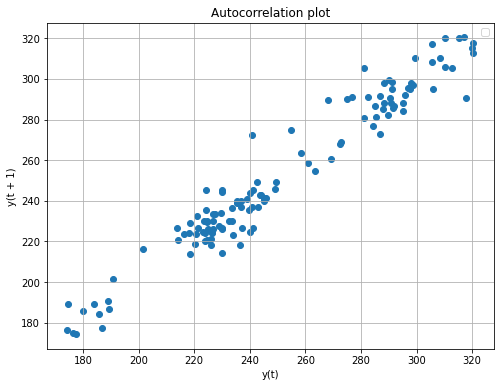

In [88]:
from pandas.plotting import lag_plot
plt.figure(figsize=(8,6))
lag_plot(a_df['Adj Close'], lag=1)
plt.title('Autocorrelation plot')
plt.grid(True)
plt.legend();

from pandas import DataFrame
from pandas import concat
values = DataFrame(a_df['Adj Close'].values)
dataframe = concat([values.shift(120), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

In [89]:
# Create our model using whole data set
model = AutoReg(a_df['Adj Close'], 31)
model_fit = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [90]:
train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)

In [94]:
train_model = AutoReg(a_df['Adj Close'], 31).fit(cov_type="HC0")

In [95]:
# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+100, dynamic=True)


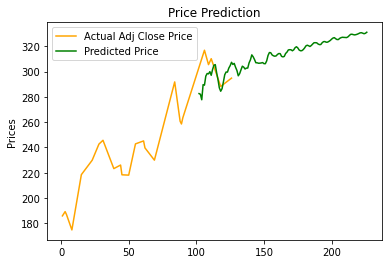

In [97]:
# Plot testing data with prediction
plt.plot(test_df['Adj Close'], 'orange', label='Actual Adj Close Price')
plt.plot(prediction, 'green', label='Predicted Price')
plt.title('Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()

In [98]:
#  RMSE and MAPE  we will Calculate the RMSE and MAPE values
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(prediction - test_df['Adj Close']))

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((prediction - test_df['Adj Close'])**2))
mape = np.mean(np.abs(prediction - test_df['Adj Close']) / test_df['Adj Close'])
mse=(np.sqrt(np.mean((prediction - test_df['Adj Close'])**2)))**2


print("RMSE:", rmse)
print("MAPE:", mape)
print("MsE", mse)
print("MAE:", mae)



RMSE: 15.230990492292216
MAPE: 0.04178991001770832
MsE 231.9830713762959
MAE: 12.871677017143986


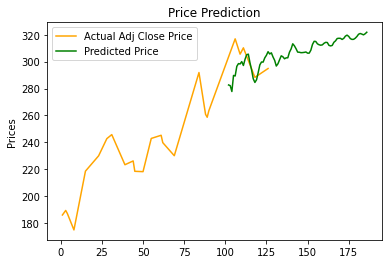

In [99]:
#Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+60, dynamic=True)
# Plot testing data with prediction
plt.plot(test_df['Adj Close'], 'orange', label='Actual Adj Close Price')
plt.plot(prediction, 'green', label='Predicted Price')
plt.title('Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()


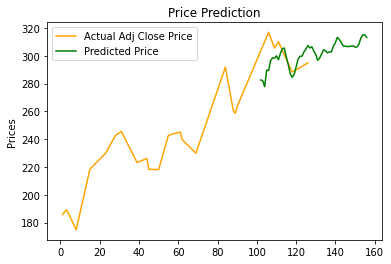

In [100]:
#Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+30, dynamic=True)
# Plot testing data with prediction
plt.plot(test_df['Adj Close'], 'orange', label='Actual Adj Close Price')
plt.plot(prediction, 'green', label='Predicted Price')
plt.title('Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()